In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [24]:
#selected subset of dates. 
val_dates = ['180328','180329']
test_dates = ['180330','180331']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_5s_2/'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256)

In [25]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_1/   data_Goose_all_5s_2/
data_Goose_1st_15s_2/  data_Goose_all_15s_2/  model/
data_Goose_1st_2/      data_Goose_all_2/


In [26]:
len(train_loader), len(val_loader), len(test_loader)

(475, 23, 52)

In [27]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 62, 100, 5])
torch.Size([256, 1])
256
256
256


date:180409, rec:006, time:3282.0, label:0.0


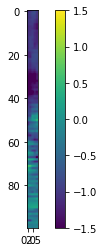

date:180324, rec:009, time:272.0, label:0.0


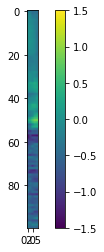

date:180414, rec:007, time:3149.0, label:0.0


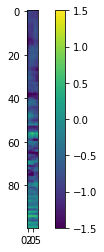

date:180412, rec:003, time:6013.0, label:1.0
date:180413, rec:003, time:5853.0, label:0.0


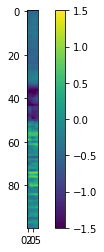

date:180414, rec:002, time:6372.0, label:1.0
date:180410, rec:005, time:129.0, label:1.0
date:180414, rec:001, time:187.0, label:0.0


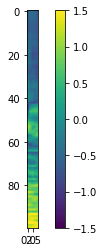

date:180327, rec:001, time:3751.0, label:1.0
date:180414, rec:007, time:4680.0, label:0.0


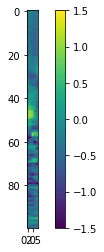

date:180413, rec:002, time:6633.0, label:0.0


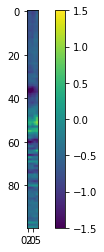

date:180414, rec:007, time:2254.0, label:0.0


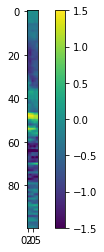

date:180324, rec:009, time:352.0, label:0.0


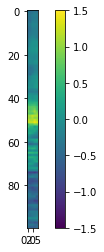

date:180412, rec:003, time:222.0, label:1.0
date:180413, rec:006, time:37.0, label:1.0
date:180414, rec:007, time:4990.0, label:0.0


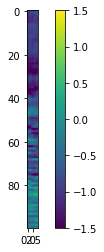

date:180327, rec:004, time:4086.0, label:1.0
date:180413, rec:002, time:4293.0, label:0.0


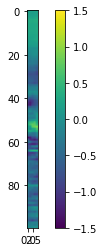

date:180414, rec:007, time:5225.0, label:0.0


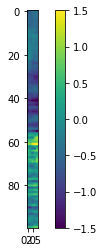

date:180413, rec:001, time:1227.0, label:0.0


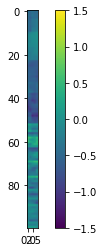

date:180413, rec:005, time:3945.0, label:1.0
date:180413, rec:001, time:6499.0, label:0.0


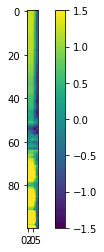

date:180401, rec:001, time:5795.0, label:1.0
date:180327, rec:007, time:3647.0, label:0.0


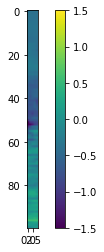

date:180327, rec:008, time:1709.0, label:0.0


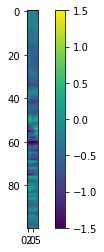

date:180409, rec:006, time:1856.0, label:1.0
date:180327, rec:005, time:5500.0, label:0.0


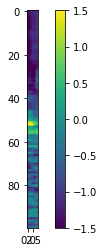

date:180325, rec:007, time:6390.0, label:0.0


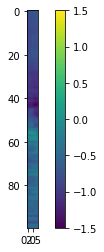

date:180327, rec:001, time:7109.0, label:0.0


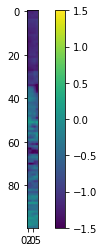

date:180322, rec:007, time:3972.0, label:0.0


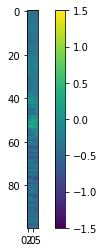

date:180325, rec:007, time:2653.0, label:0.0


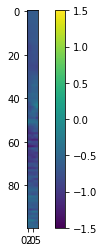

date:180326, rec:003, time:5335.0, label:1.0
date:180412, rec:002, time:2799.0, label:1.0
date:180412, rec:001, time:5005.0, label:1.0
date:180327, rec:008, time:2994.0, label:0.0


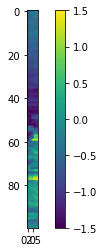

date:180413, rec:004, time:1494.0, label:1.0
date:180413, rec:002, time:6148.0, label:0.0


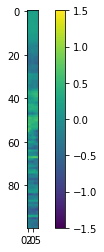

date:180413, rec:001, time:6104.0, label:0.0


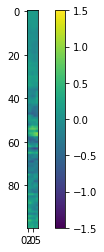

date:180327, rec:008, time:5390.0, label:0.0


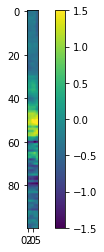

date:180411, rec:004, time:2895.0, label:1.0
date:180414, rec:005, time:4428.0, label:1.0
date:180414, rec:003, time:6449.0, label:1.0
date:180325, rec:002, time:4655.0, label:1.0
date:180413, rec:001, time:3237.0, label:0.0


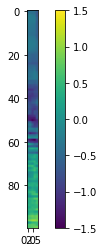

date:180410, rec:006, time:1743.0, label:1.0
date:180327, rec:001, time:217.0, label:0.0


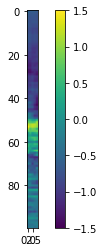

date:180322, rec:007, time:3551.0, label:0.0


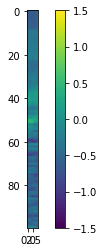

date:180409, rec:005, time:707.0, label:1.0
date:180327, rec:008, time:5490.0, label:0.0


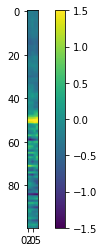

date:180412, rec:001, time:3810.0, label:1.0
date:180327, rec:007, time:1897.0, label:0.0


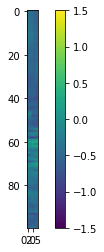

date:180411, rec:006, time:1818.0, label:1.0
date:180414, rec:004, time:3548.0, label:1.0
date:180324, rec:008, time:4726.0, label:1.0
date:180327, rec:007, time:4383.0, label:0.0


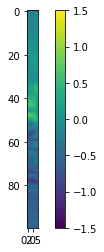

date:180323, rec:007, time:4744.0, label:0.0


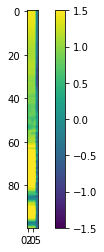

date:180322, rec:007, time:2170.0, label:0.0


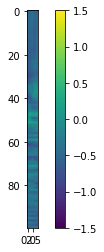

date:180323, rec:002, time:6088.0, label:1.0
date:180325, rec:009, time:37.0, label:0.0


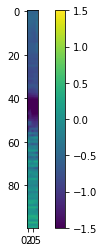

date:180323, rec:007, time:5568.0, label:0.0


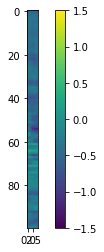

date:180410, rec:002, time:2659.0, label:1.0
date:180325, rec:001, time:5138.0, label:1.0
date:180413, rec:001, time:6304.0, label:0.0


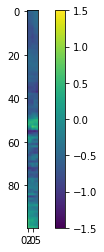

date:180410, rec:003, time:562.0, label:1.0
date:180413, rec:003, time:3178.0, label:0.0


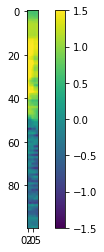

date:180413, rec:003, time:4935.0, label:0.0


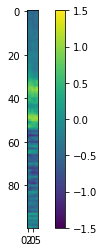

date:180325, rec:009, time:1987.0, label:0.0


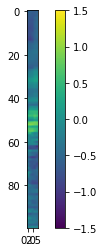

date:180322, rec:007, time:1634.0, label:0.0


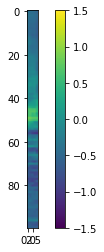

date:180324, rec:001, time:572.0, label:0.0


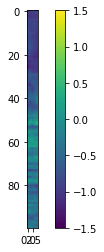

date:180323, rec:002, time:4992.0, label:1.0
date:180324, rec:009, time:47.0, label:0.0


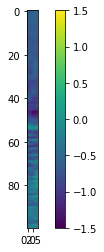

date:180413, rec:003, time:4860.0, label:0.0


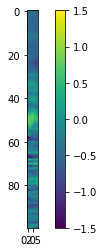

date:180412, rec:006, time:6130.0, label:0.0


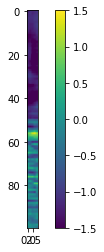

date:180327, rec:007, time:2667.0, label:0.0


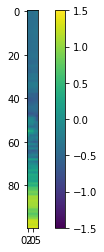

date:180327, rec:007, time:2177.0, label:0.0


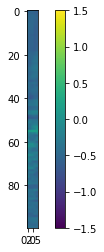

date:180414, rec:001, time:827.0, label:0.0


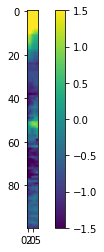

date:180327, rec:008, time:4710.0, label:0.0


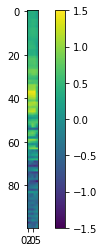

date:180409, rec:003, time:1658.0, label:1.0
date:180322, rec:003, time:3325.0, label:1.0
date:180413, rec:004, time:6003.0, label:1.0
date:180327, rec:005, time:5975.0, label:0.0


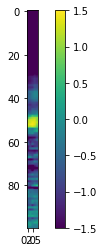

date:180414, rec:001, time:1742.0, label:0.0


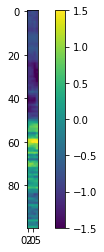

date:180411, rec:007, time:752.0, label:0.0


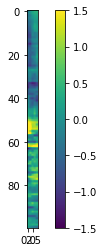

date:180412, rec:003, time:2218.0, label:1.0
date:180413, rec:004, time:4673.0, label:1.0
date:180327, rec:007, time:3867.0, label:0.0


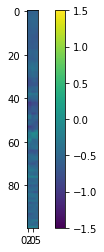

date:180327, rec:001, time:262.0, label:0.0


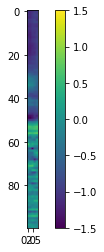

date:180413, rec:002, time:1882.0, label:0.0


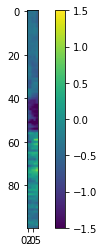

date:180327, rec:007, time:6943.0, label:0.0


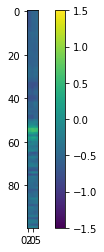

date:180414, rec:007, time:5915.0, label:0.0


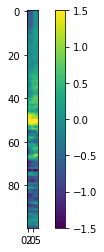

date:180327, rec:008, time:2294.0, label:0.0


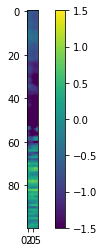

date:180411, rec:006, time:6666.0, label:0.0


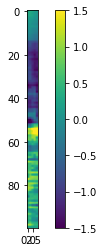

date:180327, rec:001, time:1367.0, label:0.0


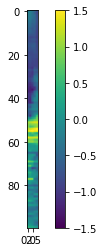

date:180325, rec:007, time:4950.0, label:0.0


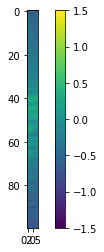

date:180324, rec:003, time:3609.0, label:1.0
date:180401, rec:001, time:27.0, label:0.0


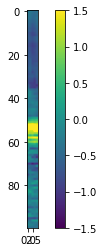

date:180414, rec:004, time:5787.0, label:1.0
date:180323, rec:002, time:112.0, label:1.0
date:180413, rec:007, time:4873.0, label:1.0
date:180401, rec:001, time:2381.0, label:1.0
date:180325, rec:009, time:2312.0, label:0.0


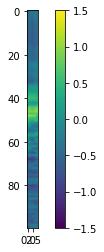

date:180325, rec:007, time:4060.0, label:0.0


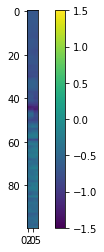

date:180325, rec:007, time:6360.0, label:0.0


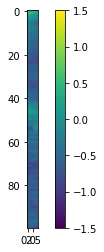

date:180327, rec:008, time:4830.0, label:0.0


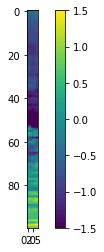

date:180410, rec:002, time:5078.0, label:1.0
date:180323, rec:003, time:5423.0, label:1.0
date:180323, rec:003, time:5133.0, label:1.0
date:180325, rec:009, time:457.0, label:0.0


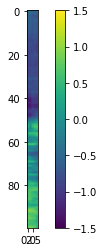

date:180327, rec:008, time:4485.0, label:0.0


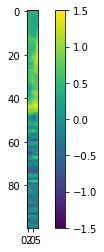

date:180413, rec:005, time:3730.0, label:1.0
date:180324, rec:001, time:302.0, label:0.0


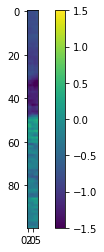

date:180322, rec:007, time:3566.0, label:0.0


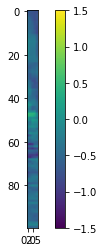

date:180409, rec:006, time:2433.0, label:0.0


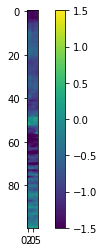

date:180413, rec:008, time:7000.0, label:1.0
date:180327, rec:007, time:3302.0, label:0.0


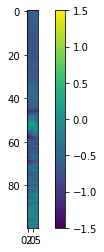

date:180325, rec:009, time:1092.0, label:0.0


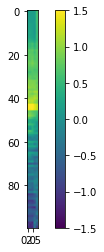

date:180325, rec:009, time:492.0, label:0.0


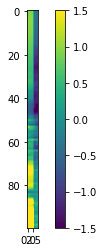

date:180323, rec:001, time:1092.0, label:0.0


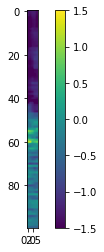

date:180413, rec:001, time:2062.0, label:0.0


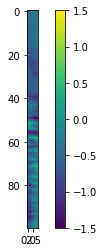

date:180323, rec:002, time:5147.0, label:1.0
date:180324, rec:008, time:3655.0, label:0.0


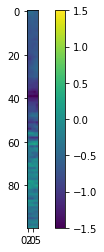

date:180401, rec:002, time:6471.0, label:1.0
date:180401, rec:001, time:2986.0, label:1.0
date:180414, rec:001, time:127.0, label:0.0


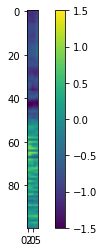

date:180412, rec:001, time:2177.0, label:1.0
date:180324, rec:009, time:1280.0, label:0.0


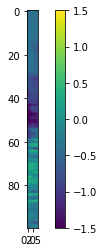

date:180413, rec:004, time:507.0, label:0.0


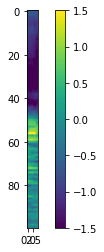

date:180322, rec:002, time:4961.0, label:1.0


In [6]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

date:180414, rec:001, time:567.0, label:0.0
date:180324, rec:005, time:6103.0, label:1.0


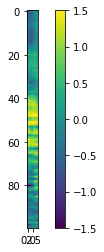

date:180412, rec:006, time:6070.0, label:0.0
date:180323, rec:001, time:972.0, label:0.0
date:180325, rec:006, time:5400.0, label:1.0


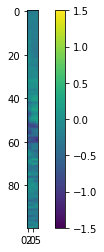

date:180409, rec:006, time:3322.0, label:0.0
date:180401, rec:001, time:677.0, label:0.0
date:180412, rec:006, time:5950.0, label:0.0
date:180327, rec:001, time:372.0, label:0.0
date:180324, rec:004, time:4846.0, label:1.0


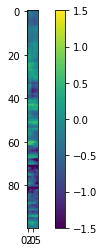

date:180413, rec:004, time:5198.0, label:1.0


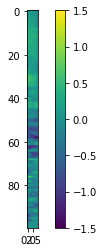

date:180322, rec:005, time:1075.0, label:1.0


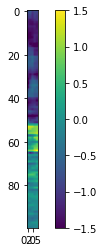

date:180327, rec:002, time:3012.0, label:1.0


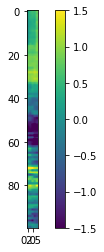

date:180327, rec:004, time:2406.0, label:0.0
date:180414, rec:005, time:3293.0, label:1.0


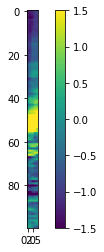

date:180326, rec:004, time:2461.0, label:1.0


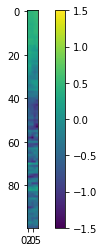

date:180413, rec:005, time:1085.0, label:1.0


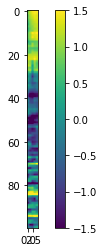

date:180324, rec:004, time:3441.0, label:1.0


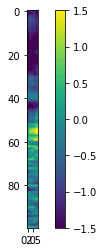

date:180412, rec:002, time:1204.0, label:1.0


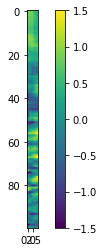

date:180401, rec:001, time:6995.0, label:1.0


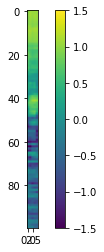

date:180325, rec:003, time:5119.0, label:1.0


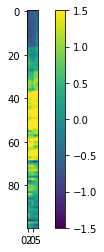

date:180325, rec:007, time:2723.0, label:0.0
date:180324, rec:008, time:6186.0, label:0.0
date:180325, rec:007, time:3063.0, label:0.0
date:180324, rec:009, time:717.0, label:0.0
date:180327, rec:002, time:2512.0, label:1.0


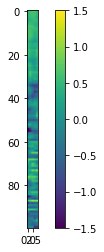

date:180327, rec:007, time:4358.0, label:0.0
date:180412, rec:006, time:4400.0, label:0.0
date:180413, rec:003, time:5200.0, label:0.0
date:180413, rec:002, time:6643.0, label:0.0
date:180411, rec:007, time:2046.0, label:0.0
date:180413, rec:002, time:6723.0, label:0.0
date:180411, rec:006, time:6108.0, label:1.0


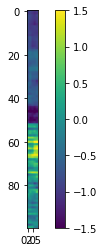

date:180414, rec:007, time:2419.0, label:0.0
date:180410, rec:002, time:3192.0, label:1.0


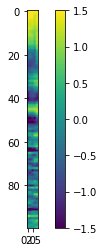

date:180327, rec:008, time:2544.0, label:0.0
date:180414, rec:002, time:3643.0, label:1.0


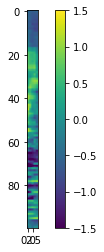

date:180414, rec:005, time:2762.0, label:0.0
date:180325, rec:009, time:1047.0, label:0.0
date:180325, rec:005, time:1206.0, label:1.0


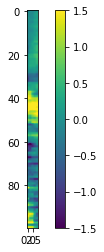

date:180325, rec:007, time:5140.0, label:0.0
date:180327, rec:001, time:1307.0, label:0.0
date:180413, rec:004, time:1306.0, label:1.0


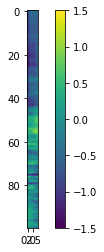

date:180326, rec:004, time:130.0, label:1.0


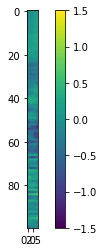

date:180409, rec:005, time:847.0, label:1.0


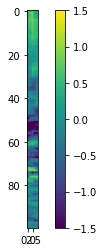

date:180413, rec:002, time:857.0, label:0.0
date:180412, rec:006, time:5590.0, label:0.0
date:180414, rec:007, time:2864.0, label:0.0
date:180410, rec:005, time:6779.0, label:1.0


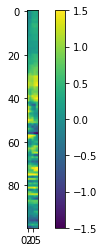

date:180410, rec:005, time:3086.0, label:1.0


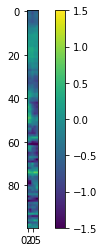

date:180413, rec:002, time:3552.0, label:0.0
date:180327, rec:007, time:1087.0, label:0.0
date:180412, rec:002, time:674.0, label:1.0


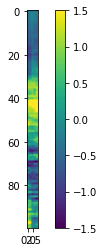

date:180411, rec:005, time:1267.0, label:1.0


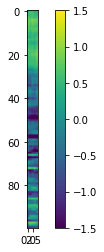

date:180413, rec:005, time:2040.0, label:1.0


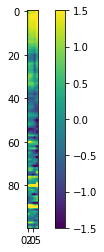

date:180324, rec:006, time:6170.0, label:1.0


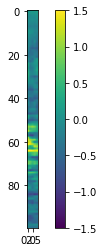

date:180413, rec:002, time:1367.0, label:0.0
date:180327, rec:007, time:6783.0, label:0.0
date:180411, rec:007, time:757.0, label:0.0
date:180327, rec:007, time:2092.0, label:0.0
date:180413, rec:008, time:2970.0, label:1.0


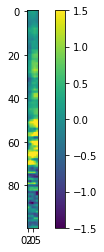

date:180322, rec:002, time:3726.0, label:1.0


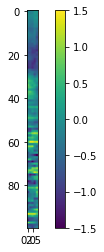

date:180413, rec:001, time:2352.0, label:0.0
date:180326, rec:004, time:2756.0, label:1.0


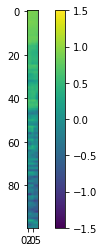

date:180323, rec:001, time:1302.0, label:0.0
date:180413, rec:005, time:5359.0, label:1.0


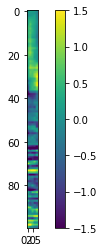

date:180323, rec:001, time:1302.0, label:0.0
date:180412, rec:006, time:5640.0, label:0.0
date:180413, rec:001, time:2512.0, label:0.0
date:180323, rec:001, time:1097.0, label:0.0
date:180324, rec:009, time:127.0, label:0.0
date:180411, rec:007, time:227.0, label:0.0
date:180413, rec:003, time:4567.0, label:1.0


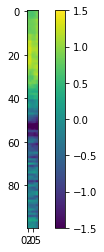

date:180414, rec:001, time:2072.0, label:0.0
date:180325, rec:004, time:232.0, label:1.0


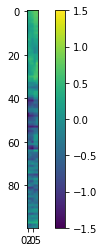

date:180323, rec:001, time:22.0, label:0.0
date:180324, rec:005, time:1887.0, label:1.0


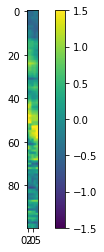

date:180323, rec:002, time:1864.0, label:1.0


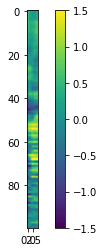

date:180411, rec:006, time:6661.0, label:0.0
date:180325, rec:001, time:862.0, label:0.0
date:180324, rec:008, time:5135.0, label:0.0
date:180325, rec:006, time:6693.0, label:1.0


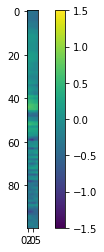

date:180323, rec:007, time:5508.0, label:0.0
date:180323, rec:002, time:612.0, label:1.0


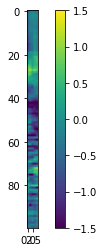

date:180409, rec:005, time:567.0, label:1.0


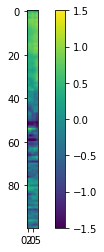

date:180413, rec:004, time:567.0, label:0.0
date:180414, rec:005, time:6036.0, label:1.0


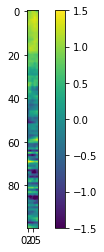

date:180413, rec:003, time:6408.0, label:0.0
date:180327, rec:007, time:314.0, label:1.0


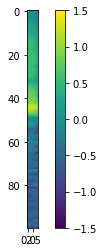

date:180325, rec:003, time:5719.0, label:1.0


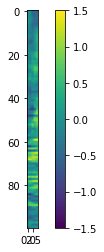

date:180409, rec:004, time:5067.0, label:1.0


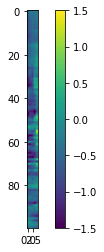

date:180327, rec:004, time:3742.0, label:1.0


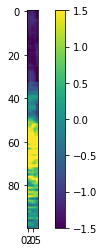

date:180327, rec:007, time:6983.0, label:0.0
date:180411, rec:006, time:7151.0, label:0.0
date:180412, rec:001, time:6495.0, label:1.0


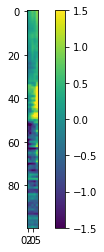

date:180323, rec:005, time:3423.0, label:1.0


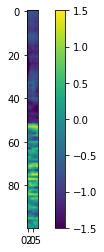

date:180324, rec:008, time:303.0, label:1.0


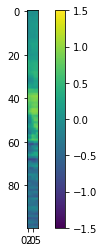

date:180327, rec:007, time:4257.0, label:0.0
date:180412, rec:001, time:5250.0, label:1.0


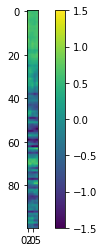

date:180324, rec:001, time:3192.0, label:1.0


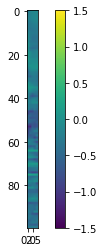

date:180409, rec:006, time:6985.0, label:0.0
date:180327, rec:005, time:1017.0, label:1.0


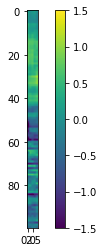

date:180325, rec:003, time:6399.0, label:1.0


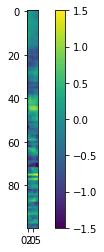

date:180410, rec:006, time:5509.0, label:0.0
date:180323, rec:002, time:7100.0, label:1.0


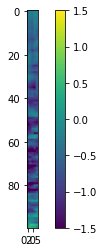

date:180413, rec:004, time:4708.0, label:1.0


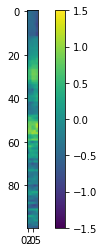

date:180401, rec:001, time:257.0, label:0.0
date:180327, rec:002, time:4705.0, label:1.0


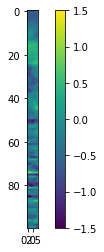

date:180327, rec:008, time:5425.0, label:0.0
date:180327, rec:005, time:6539.0, label:0.0
date:180327, rec:008, time:2804.0, label:0.0
date:180413, rec:002, time:3482.0, label:0.0
date:180327, rec:007, time:3107.0, label:0.0
date:180413, rec:007, time:1400.0, label:1.0


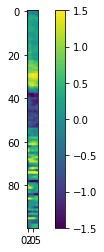

date:180322, rec:007, time:3491.0, label:0.0
date:180414, rec:001, time:3564.0, label:0.0
date:180413, rec:004, time:2193.0, label:1.0


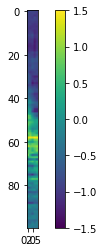

date:180409, rec:006, time:1250.0, label:1.0


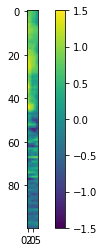

date:180327, rec:001, time:4298.0, label:1.0


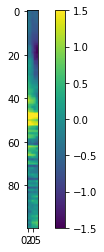

date:180414, rec:007, time:6360.0, label:0.0
date:180324, rec:006, time:4520.0, label:1.0


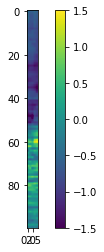

date:180322, rec:007, time:5137.0, label:0.0
date:180325, rec:001, time:6262.0, label:1.0


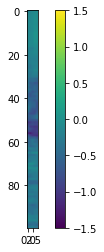

date:180401, rec:001, time:5965.0, label:1.0


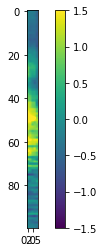

date:180413, rec:001, time:3017.0, label:0.0
date:180324, rec:008, time:6736.0, label:0.0
date:180410, rec:003, time:3172.0, label:1.0


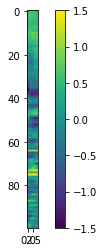

date:180325, rec:007, time:4960.0, label:0.0


In [10]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 1.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [28]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 'all'
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_alldata_upsample'
timewindow = 5

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
import time
start = time.time()
print(time.time())

1617747723.1871238


In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.4680127501487732
Val loss for epoch 0: 0.4219668209552765
Train loss for epoch 1: 0.384981244802475
Val loss for epoch 1: 0.4313933551311493
Train loss for epoch 2: 0.36906948685646057
Val loss for epoch 2: 0.5415741801261902
Train loss for epoch 3: 0.3545578122138977
Val loss for epoch 3: 0.4409171938896179
Train loss for epoch 4: 0.3581039607524872
Val loss for epoch 4: 0.7322214245796204
Train loss for epoch 5: 0.32944148778915405
Val loss for epoch 5: 0.3735828697681427
5
Train loss for epoch 6: 0.33752191066741943
Val loss for epoch 6: 0.49499034881591797
Train loss for epoch 7: 0.32785895466804504
Val loss for epoch 7: 0.5441829562187195
Train loss for epoch 8: 0.3243248462677002
Val loss for epoch 8: 0.35857656598091125
8
Train loss for epoch 9: 0.313847154378891
Val loss for epoch 9: 0.5140615105628967
Train loss for epoch 10: 0.3056003153324127
Val loss for epoch 10: 0.5054795742034912
Train loss for epoch 11: 0.3056066036224365
Val loss for epoch 11:

In [14]:
end = time.time()
print(time.time()) # around 28 mins

1617755080.4596488


In [15]:
print(end-start)


7357.272492408752


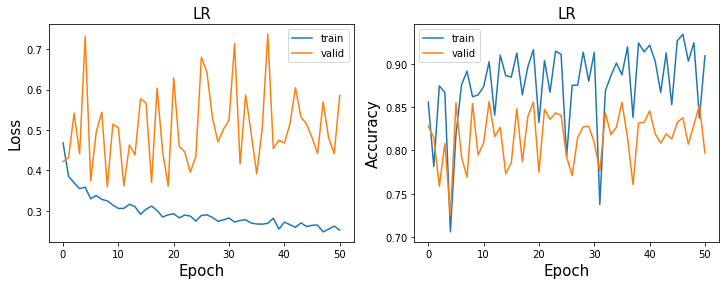

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [29]:
best_epoch = 8

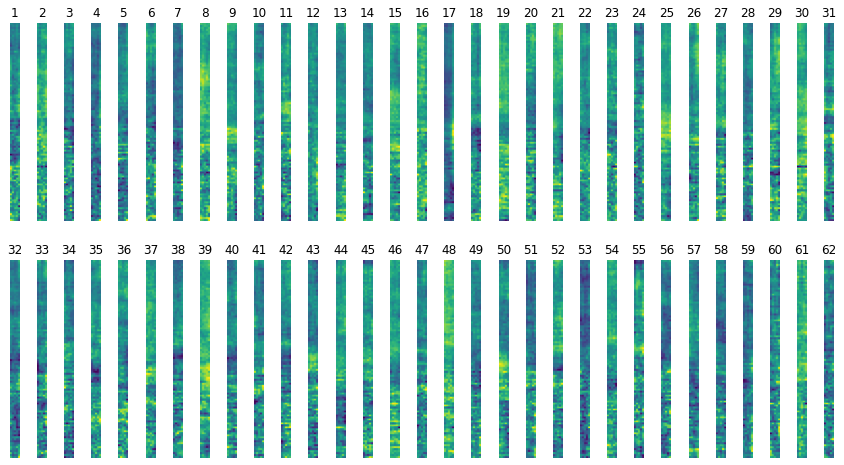

In [30]:
model = GLM(62*100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [31]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.47414425015449524 accuracy:0.825732407127756


In [32]:
np.mean(np.concatenate(test_labels))

0.73527634

In [33]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

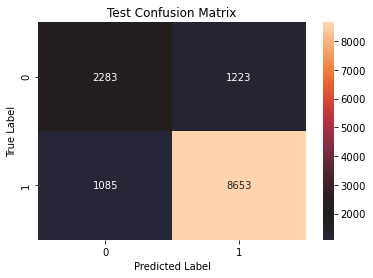

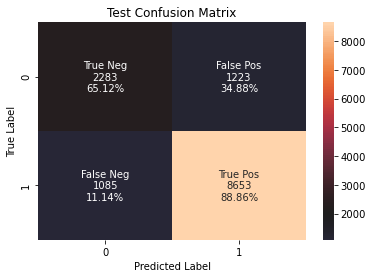

In [34]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:003, time:5415.0, label:1.0
Original data 62 CH


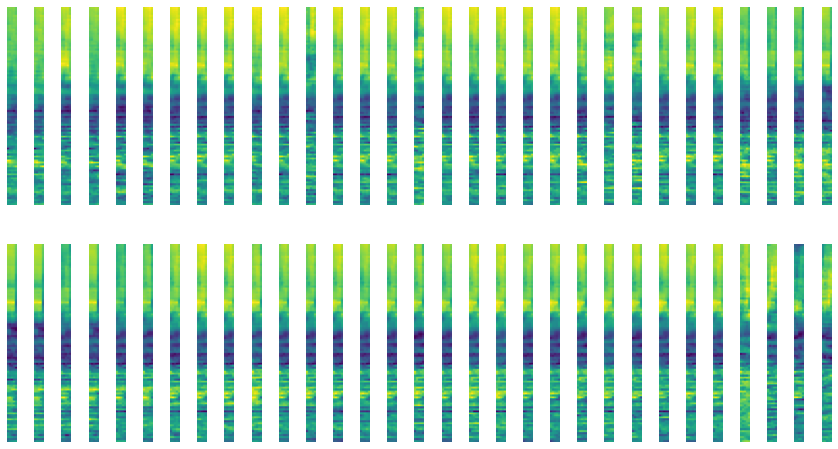

In [24]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_0[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [35]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.4747346341609955
Val loss for epoch 0: 0.5546634793281555
Train loss for epoch 1: 0.38402435183525085
Val loss for epoch 1: 0.7265437841415405
Train loss for epoch 2: 0.37268659472465515
Val loss for epoch 2: 0.47853127121925354
2
Train loss for epoch 3: 0.3587840497493744
Val loss for epoch 3: 0.5684579014778137
Train loss for epoch 4: 0.3449774384498596
Val loss for epoch 4: 0.551602303981781
Train loss for epoch 5: 0.3411756455898285
Val loss for epoch 5: 0.4012594223022461
5
Train loss for epoch 6: 0.3186742663383484
Val loss for epoch 6: 0.45170730352401733
Train loss for epoch 7: 0.33843109011650085
Val loss for epoch 7: 0.4994982182979584
Train loss for epoch 8: 0.3327487111091614
Val loss for epoch 8: 0.3858792185783386
8
Train loss for epoch 9: 0.3280796408653259
Val loss for epoch 9: 0.37797674536705017
9
Train loss for epoch 10: 0.3156431019306183
Val loss for epoch 10: 0.35797691345214844
10
Train loss for epoch 11: 0.30731430649757385
Val loss for

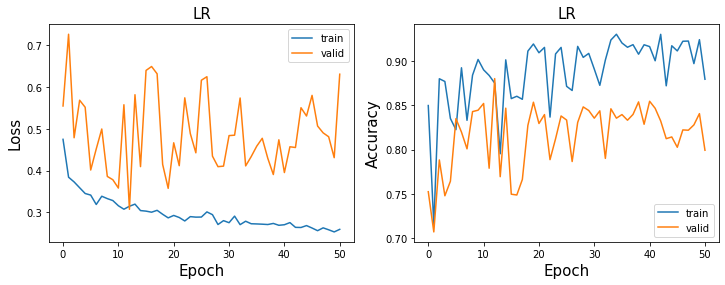

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

In [36]:
best_epoch = 12

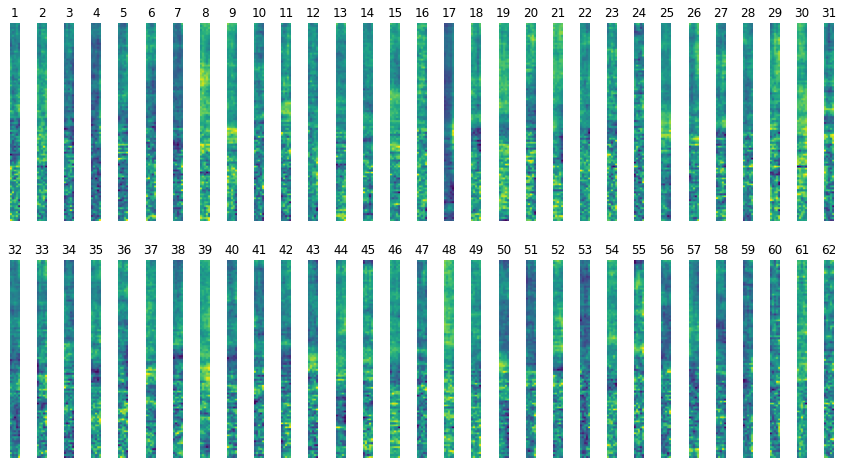

In [37]:
model = GLM(62*100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [38]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.4773671627044678 accuracy:0.8304137722742374


In [39]:
np.mean(np.concatenate(test_labels))

0.73527634

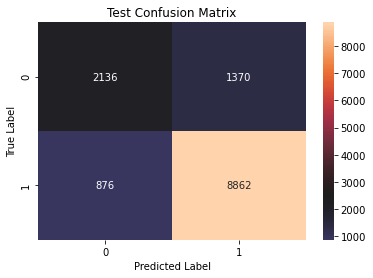

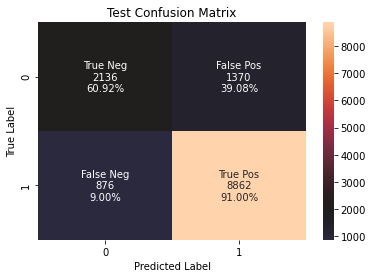

In [40]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2500)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:003, time:4529.0, label:1.0
Original data 62 CH


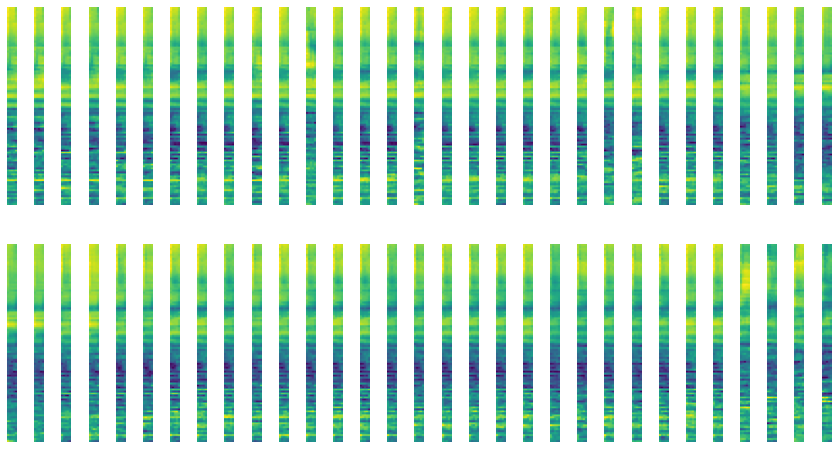

In [32]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()



### Logistic Regression with finite difference regularization

In [41]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 25
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [14]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.522857129573822
Val loss for epoch 0: 0.4697056710720062
Train loss for epoch 1: 0.4550786018371582
Val loss for epoch 1: 0.46216636896133423
1
Train loss for epoch 2: 0.45235005021095276
Val loss for epoch 2: 0.5345407724380493
Train loss for epoch 3: 0.46245819330215454
Val loss for epoch 3: 0.7674054503440857
Train loss for epoch 4: 0.48297008872032166
Val loss for epoch 4: 0.44493764638900757
4
Train loss for epoch 5: 0.4602843225002289
Val loss for epoch 5: 0.4169713854789734
5
Train loss for epoch 6: 0.45095768570899963
Val loss for epoch 6: 0.5629109144210815
Train loss for epoch 7: 0.45942676067352295
Val loss for epoch 7: 0.6454867124557495
Train loss for epoch 8: 0.46355292201042175
Val loss for epoch 8: 0.7208479642868042
Train loss for epoch 9: 0.46051275730133057
Val loss for epoch 9: 0.6357625126838684
Train loss for epoch 10: 0.46605685353279114
Val loss for epoch 10: 0.43350014090538025
Train loss for epoch 11: 0.4547743499279022
Val loss for e

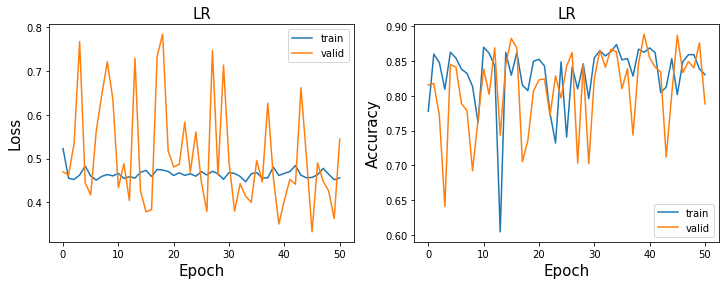

In [15]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [42]:
best_epoch = 45

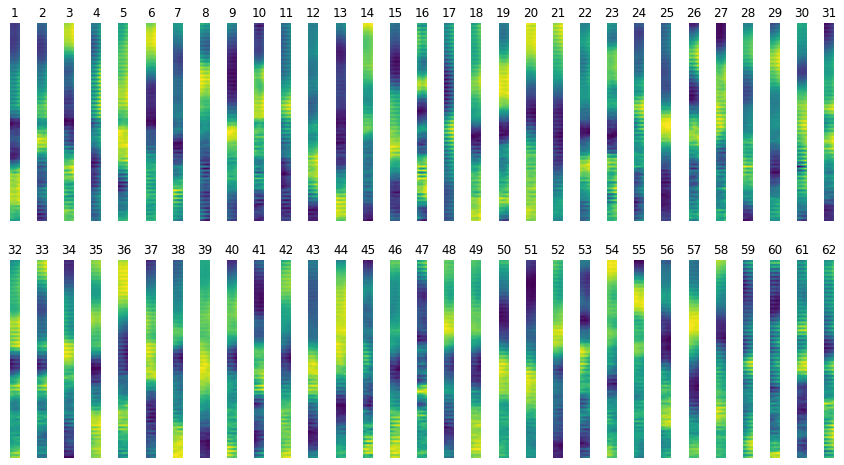

In [43]:
model = GLM(62*100*timewindow).to(device)
path =model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [44]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.5399358868598938 accuracy:0.8077620054364241


In [45]:
np.mean(np.concatenate(test_labels))

0.73527634

In [46]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_2, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

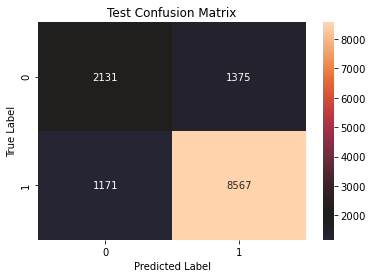

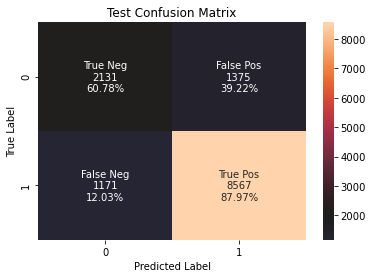

In [47]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:003, time:62.0, label:1.0
Original data 62 CH


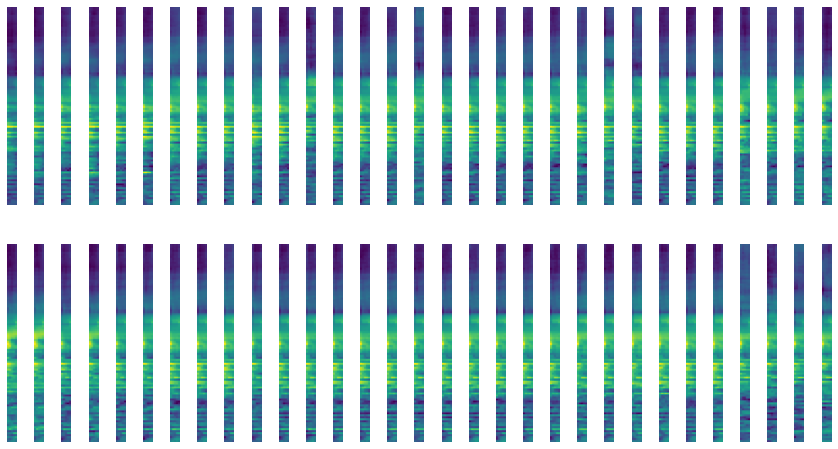

In [22]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][2], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

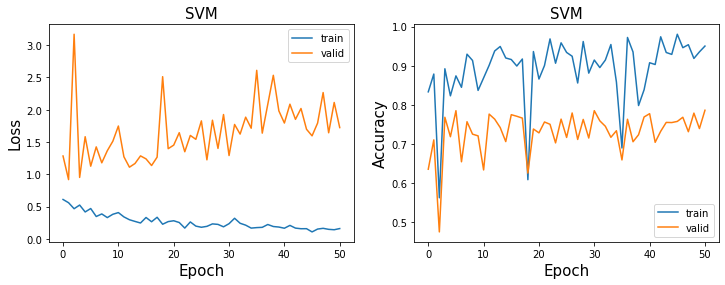

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

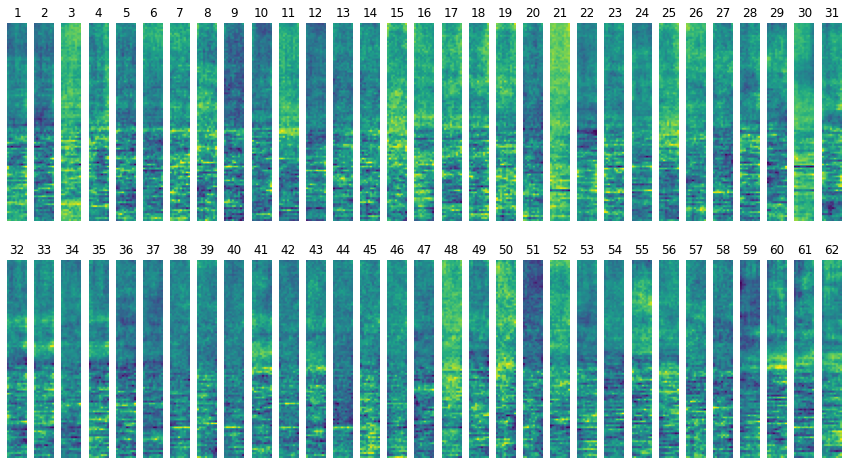

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


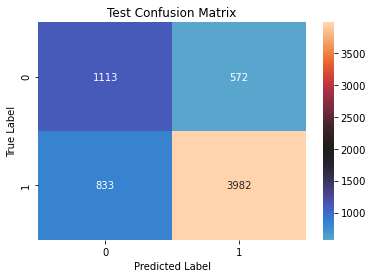

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


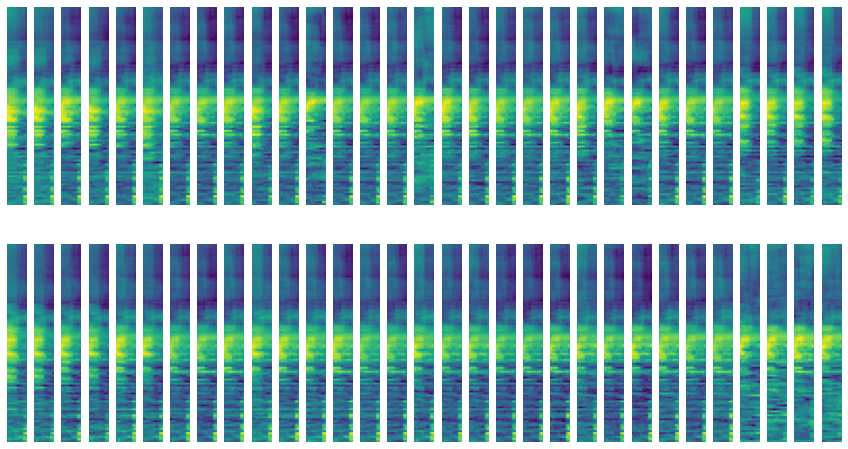

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

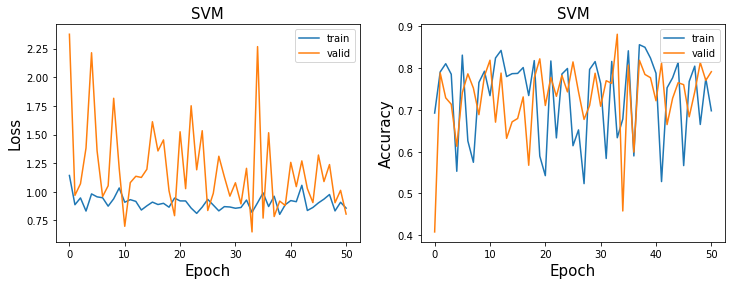

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

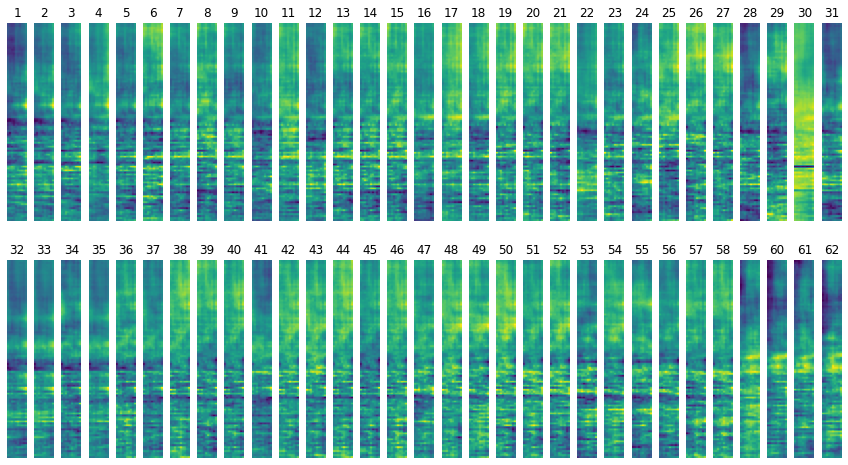

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


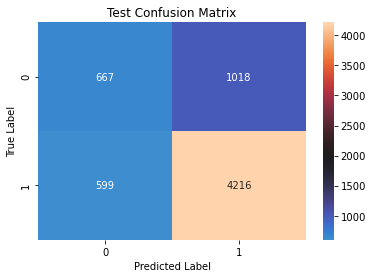

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


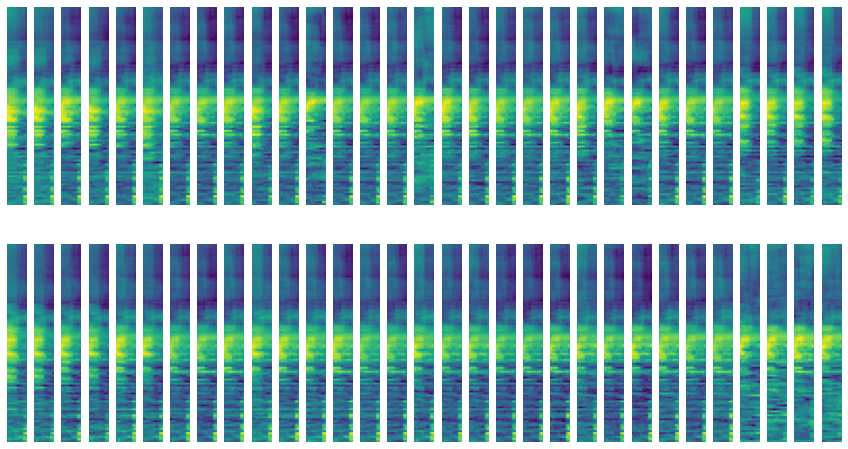

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

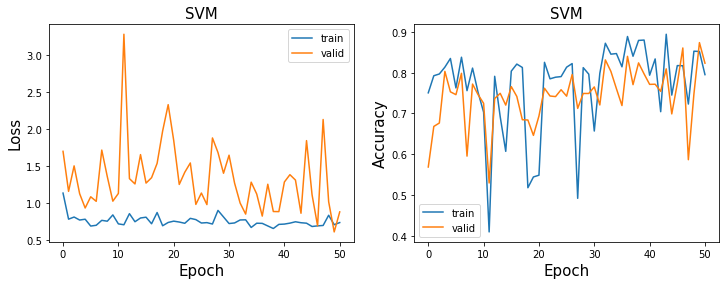

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

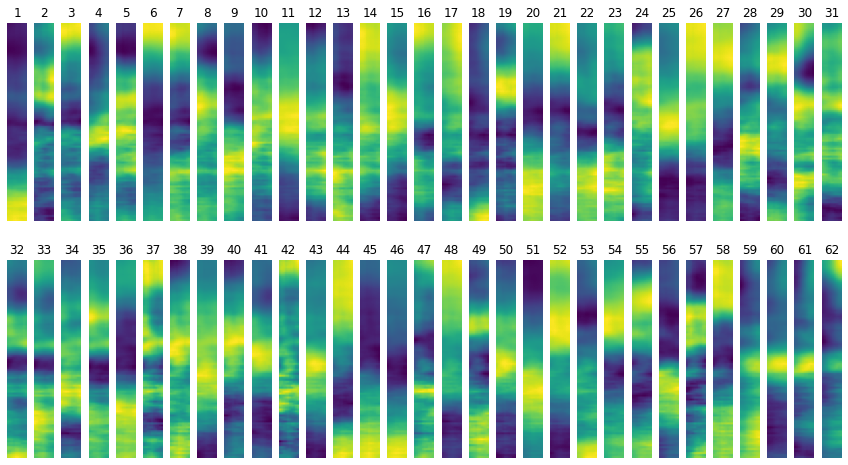

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


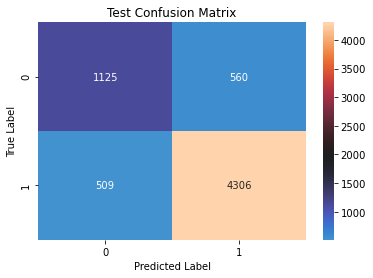

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


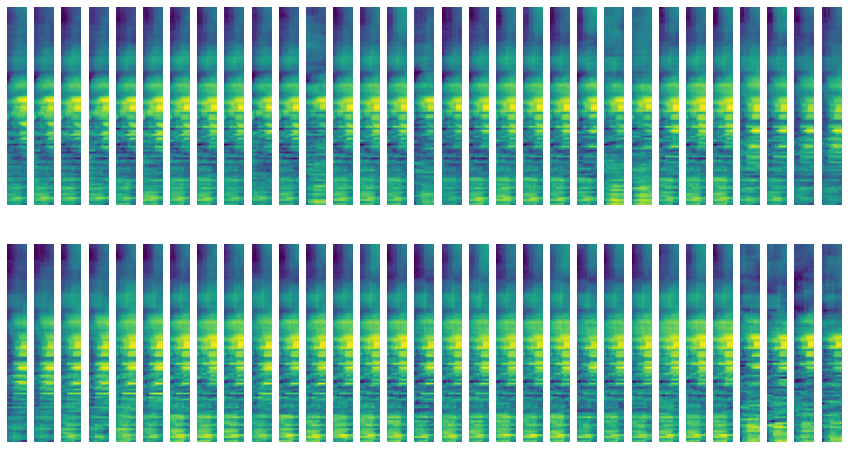

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()